## Heart Disease Prediction

In this machine learning project, I have collected the dataset from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) and will be using Machine Learning Logistic Regression model to make predictions on whether a person is suffering from Heart Disease or not.

In [1]:
#@ Importing the required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#@ Loading csv data into pandas dataframe
df = pd.read_csv('data.csv')
#@ Print first 5rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
#@ Getting some info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#@ Checking for the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [8]:
#@ Getting some statistical measures of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Data Visualization
- Let, us visualize the data for the better understanding then we can do processing as we want to do.

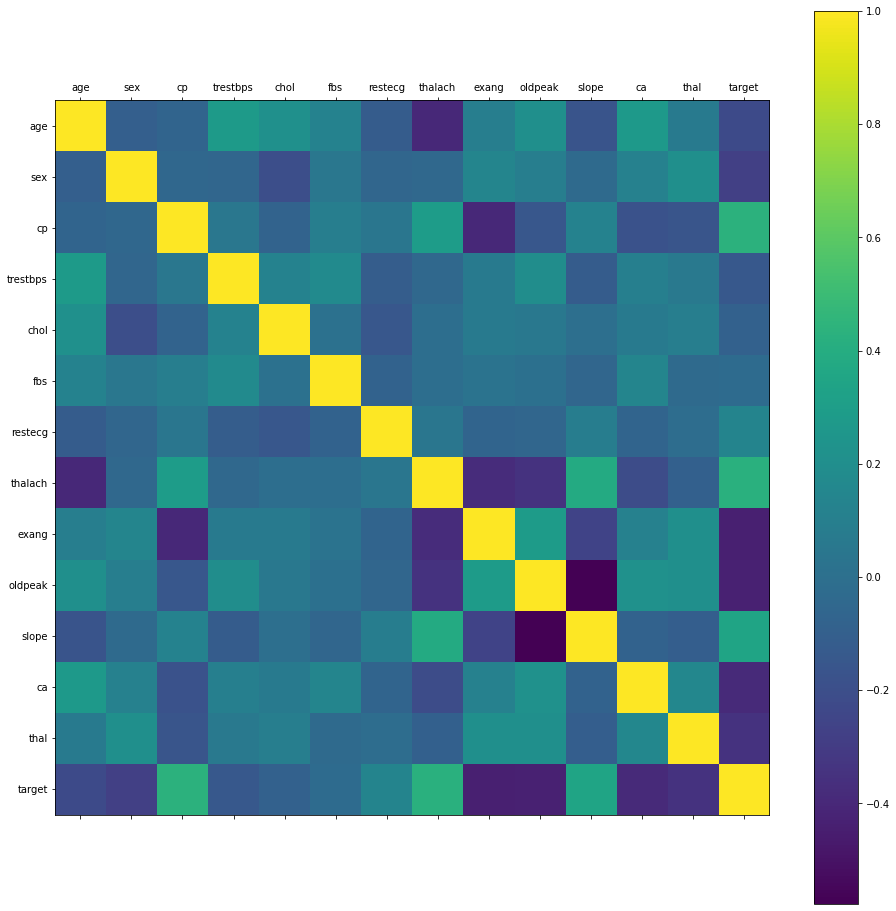

In [10]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

Here, few of the featues have negative correaltion with the target valur while few of them have positive.

Text(0.5, 1.0, 'Counting each Target Class')

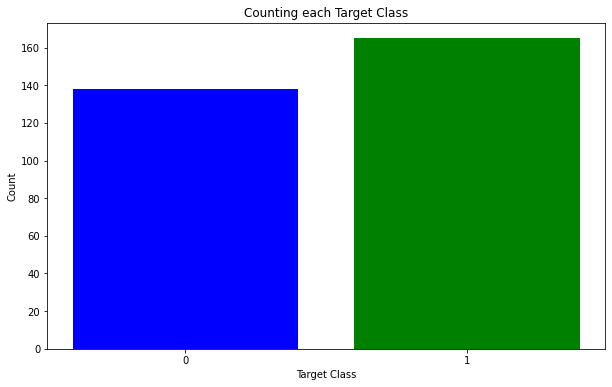

In [11]:
rcParams['figure.figsize'] = 10,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['green', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Counting each Target Class')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

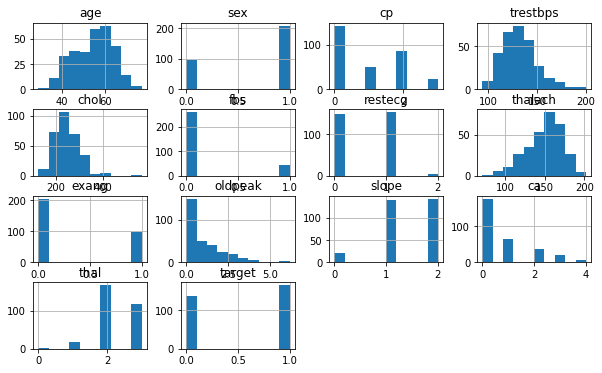

In [12]:
df.hist()

- Observing the histogram, we can see that each feature has a different range of distribution. 

### Applying `train_test_split` to split the dataset into training and testing datasets.

In [13]:
#@ Splitting the data into features and target variable
X = df.drop(columns = 'target', axis = 1)
y = df['target']
print(X)
print('The target variable of the data is \n' , y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
#@ Applying train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (203, 13) (100, 13)


### Training the model & Model Evaluation

In [15]:
#@ Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
#@ Accuracy score on training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print("The accuracy on the training data is:", training_data_accuracy)

The accuracy on the training data is: 0.8325123152709359


In [17]:
#@ Accuracy on the test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print("The accuracy on the test data is:", test_data_accuracy)

The accuracy on the test data is: 0.89


### Building a Predictive System

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)
inp_data_as_numpy_array = np.asarray(input_data)             # chaning data into numpy array
input_data_reshaped = inp_data_as_numpy_array.reshape(1, -1)         # reshape the numpy array as we are predicting for only on instance
prediction = model.predict(input_data_reshaped)
print('The prediction is:', prediction)

if(prediction[0] == 0):
    print('The person does not have heart disease')
else:
    print('The person has heart disease')

The prediction is: [1]
The person has heart disease


**Conclusion:**
- In this project, I used Machine Learning to predict whether a person is suffering from a heart disease or not. After importing the data, I analysed it using plots. The I applied simple Logistic Regression algorithm and while training the model I achieved `83%` accuracy on training data & `89%` accuracy on the test data.